In [1]:
import os

import numpy as np
from worldmodels.params import home

from worldmodels.vision.vae import VAE
from worldmodels.params import vae_params

import matplotlib.pyplot as plt

import matplotlib
import imageio
matplotlib.rcParams.update({'font.size': 8})

vae_params['load_model'] = True
vae = VAE(**vae_params)

root = os.path.join(home, 'controller-samples')

def load_episode(seed):
    from collections import defaultdict
    path = os.path.join(home, 'controller-samples', str(seed))

    data = defaultdict(list)
    files = os.listdir(path)
    files = [r for r in files if 'DS_Store' not in r if '.gif' not in r]

    for fi in files:
        if len(fi) > 4:
            data[fi[:-4]] = np.load(
                os.path.join(path, fi)
            )

    data['labels'] = data['latent'][1:].reshape(-1, 32)
    data['preds'] = data['pred-latent'][:-1].reshape(-1, 32)
    data['error'] = np.mean(np.abs(data['labels'] - data['preds']), axis=1)
    
    return data

seed = '2357136044'
data = load_episode(seed)

loading model from /Users/adam/world-models-experiments/vae-training/models


/Users/adam/world-models-experiments/controller-samples/2357136044/gif/0.png


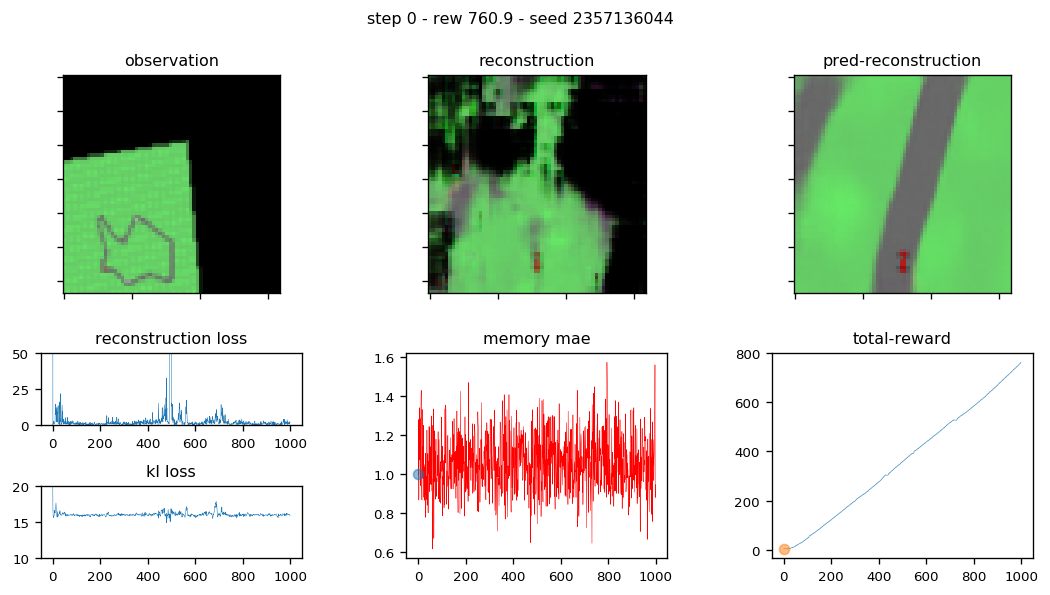

In [2]:
image_files = []

for idx in range(1):
    dpi = 120
    base = (256, 128)
    scale = 5
    fig = plt.figure(constrained_layout=False, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

    gs = fig.add_gridspec(3, 3)

    widths = [3, 3, 3]
    heights = [3, 1, 1]
    gs = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                              height_ratios=heights)

    ax0 = fig.add_subplot(gs[0, 0])

    im = data['observation'][idx]
    ax0.imshow(im)
    ax0.set_title('observation')

    re = data['reconstruct'][idx].reshape(64, 64, 3)
    ax1 = fig.add_subplot(gs[0, 1])

    ax1.imshow(re)
    ax1.set_title('reconstruction')

    pred_re = data['pred-reconstruct'][idx].reshape(64, 64, 3)
    ax2 = fig.add_subplot(gs[0, 2])

    ax2.imshow(pred_re)
    ax2.set_title('pred-reconstruction')

    ax31 = fig.add_subplot(gs[1, 0])
    ax31.plot(data['vae-loss-reconstruct'], linewidth=0.3)
    ax31.plot(idx, data['vae-loss-reconstruct'][idx], marker='o', alpha=0.5)
    ax31.set_title('reconstruction loss')
    ax31.set_ylim((0, 50))

    ax32 = fig.add_subplot(gs[2, 0])
    ax32.plot(data['vae-loss-unclipped-kl'], linewidth=0.3)
    ax32.plot(idx, data['vae-loss-unclipped-kl'][idx], marker='o', alpha=0.5)
    ax32.set_title('kl loss')
    ax32.set_ylim((10, 20))

    ax4 = fig.add_subplot(gs[1:, 1]) 
    ax4.plot(data['error'], color='red', label='memory mae', linewidth=0.3)
    ax4.set_title('memory mae')
    ax4.plot(idx, data['error'][min(idx, 998)], marker='o', alpha=0.5)

    ax5 = fig.add_subplot(gs[1:, 2]) 
    ax5.plot(data['total-reward'], linewidth=0.3)
    ax5.set_title('total-reward')
    ax5.plot(idx, data['total-reward'][idx], marker='o', alpha=0.5)

    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    fig.suptitle('step {} - rew {:3.1f} - seed {}'.format(idx, data['total-reward'][-1], seed))
    out_dir = os.path.join(home, 'controller-samples', str(seed), 'gif')
    os.makedirs(out_dir, exist_ok=True)
    f_name = os.path.join(out_dir, '{}.png'.format(idx))
    fig.savefig(f_name)
    image_files.append(imageio.imread(f_name))
    print(f_name)
    
    for ax in [ax0, ax1, ax2]:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    
anim_file = os.path.join(home, 'controller-samples', str(seed), 'rollout.gif')
#print('saving to gif')
#imageio.mimsave(anim_file, image_files, duration=0.2)

In [3]:
name = 'observation'

root = os.path.join(home, 'controller-samples')
rollouts = os.listdir(root)
print(rollouts)

# for rollout in rollouts:

# for name in names
name = 'observation'
obser = np.load(
    os.path.join(root, '2357136044', '{}.npy'.format(name))
)

name = 'reconstruct'
reconstruct = np.load(
    os.path.join(root, '2357136044', '{}.npy'.format(name))
)

reconstruct = np.squeeze(reconstruct)

['2360782358', '3607553667', '4290846341', '3835177981', '1249426360', '1877166739', '1805465960', '3638918503', '2678185683', '1013994432', '1650906866', '1418777250', '2445173525', '491263', '303761048', '3684848379', '521102280', '2193987840', '630311759', '3041471737', '2357136044', '1298508491', '4282876139', '2081981515', '4005303368', '550290313', '794921487', '396591248', '2588848963', '2365658986', '1872583848', '3071714933', '80522091', '1791095845', '4070471979', '1819583497', '4000937544', '2340255427', '1869695442', '2774094101', '663257521', '3849549514', '1376693511', '2546248239', '111352301', '3093770124', '1703301249', '3626093760']


W0219 09:44:44.028645 4515466688 base_layer.py:1814] Layer conv2d is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

/Users/adam/.pyenv/versions/3.6.8/envs/world-models/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_bac

{'reconstruction-loss': <tf.Tensor: id=643, shape=(), dtype=float32, numpy=7.701976>, 'unclipped-kl-loss': <tf.Tensor: id=653, shape=(1,), dtype=float32, numpy=array([15.678124], dtype=float32)>, 'kl-loss': <tf.Tensor: id=657, shape=(), dtype=float32, numpy=16.0>}


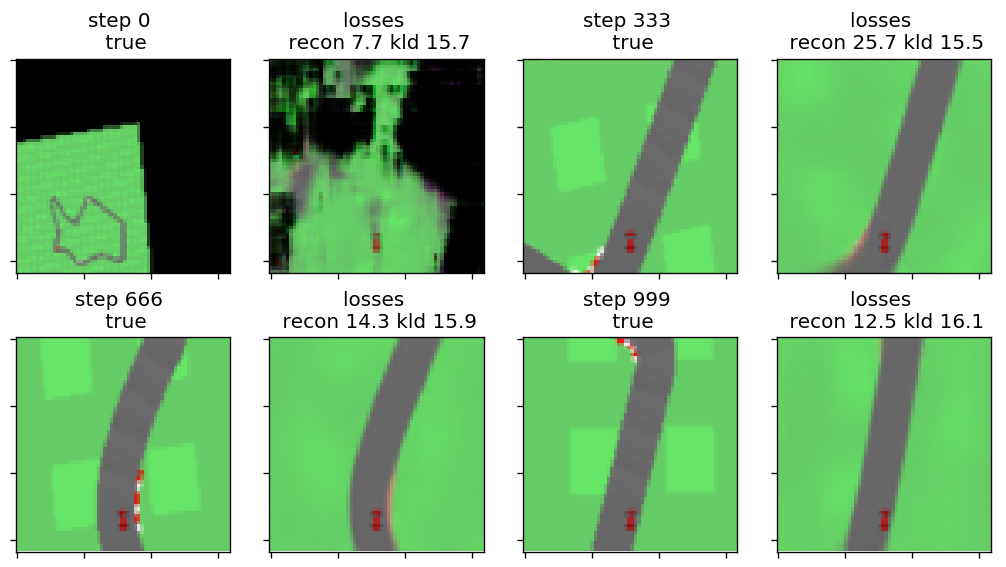

In [4]:
n_sample = 2
plt.style.use('default')

samples = np.linspace(0, obser.shape[0] - 1, 4).astype(int)

dpi = 120
base = (256, 128)
scale = 5
f, axes = plt.subplots(int(len(samples) / 2), 4, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

sample = samples[0]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
print(losses)
axes[0, 0].imshow(obs)
axes[0, 1].imshow(reconstruct[sample])
axes[0, 0].set_title('step {} \n true'.format(sample))
axes[0, 1].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[1]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[0, 2].imshow(obs)
axes[0, 3].imshow(reconstruct[sample])
axes[0, 2].set_title('step {} \n true'.format(sample))
axes[0, 3].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[2]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[1, 0].imshow(obs)
axes[1, 1].imshow(reconstruct[sample])
axes[1, 0].set_title('step {} \n true'.format(sample))
axes[1, 1].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[3]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[1, 2].imshow(obs)
axes[1, 3].imshow(reconstruct[sample])
axes[1, 2].set_title('step {} \n true'.format(sample))
axes[1, 3].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'], losses['unclipped-kl-loss'].numpy()[0]))

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0.1, hspace=0.3)

f.show()

f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/vae-reconstructions.png')

## Next obs, reconstructed obs

/Users/adam/.pyenv/versions/3.6.8/envs/world-models/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


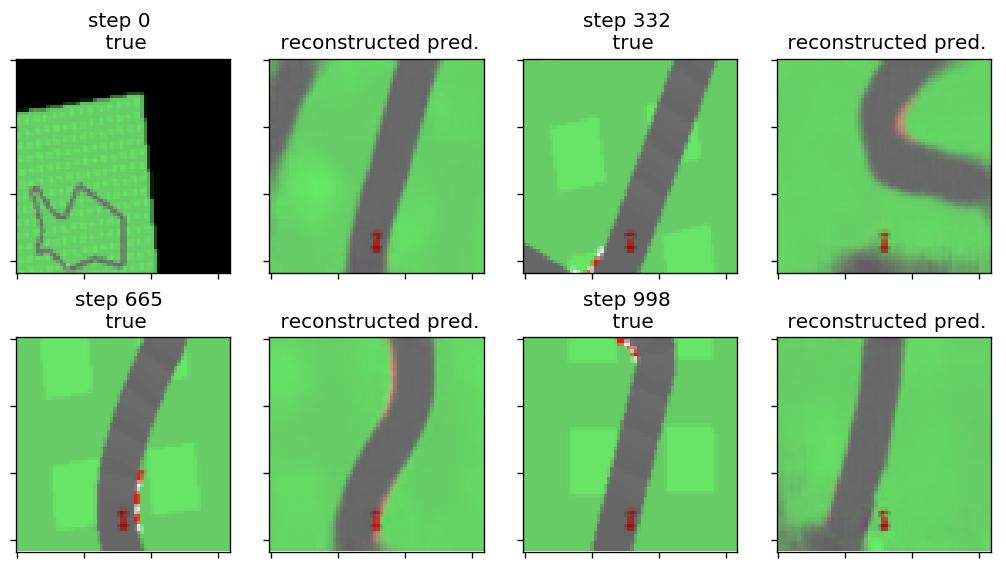

In [5]:
obser.shape
plt.style.use('default')

name = 'pred-reconstruct'
pred_reconstruct = np.load(
    os.path.join(root, '2357136044', '{}.npy'.format(name))
)

pred_reconstruct.shape

obser = obser[1:]
pred_reconstruct = pred_reconstruct[:-1]

dpi = 120
samples = np.linspace(0, obser.shape[0] - 1, 4).astype(int)
base = (256, 128)
scale = 5
f, axes = plt.subplots(int(len(samples) / 2), 4, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

sample = samples[0]
obs = obser[sample]
axes[0, 0].imshow(obs)
axes[0, 1].imshow(pred_reconstruct[sample])
axes[0, 0].set_title('step {} \n true'.format(sample))
axes[0, 1].set_title(' \n reconstructed pred.')

sample = samples[1]
obs = obser[sample]
axes[0, 2].imshow(obs)
axes[0, 3].imshow(pred_reconstruct[sample])
axes[0, 2].set_title('step {} \n true'.format(sample))
axes[0, 3].set_title(' \n reconstructed pred.')

sample = samples[2]
obs = obser[sample]
axes[1, 0].imshow(obs)
axes[1, 1].imshow(pred_reconstruct[sample])
axes[1, 0].set_title('step {} \n true'.format(sample))
axes[1, 1].set_title(' \n reconstructed pred.')

sample = samples[3]
obs = obser[sample]
axes[1, 2].imshow(obs)
axes[1, 3].imshow(pred_reconstruct[sample])
axes[1, 2].set_title('step {} \n true'.format(sample))
axes[1, 3].set_title(' \n reconstructed pred.')

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.subplots_adjust(wspace=0.1, hspace=0.3)

f.show()
f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/memory-reconstructions.png')


## Sample VAE from noise

W0219 09:44:46.363560 4515466688 base_layer.py:1814] Layer dense_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



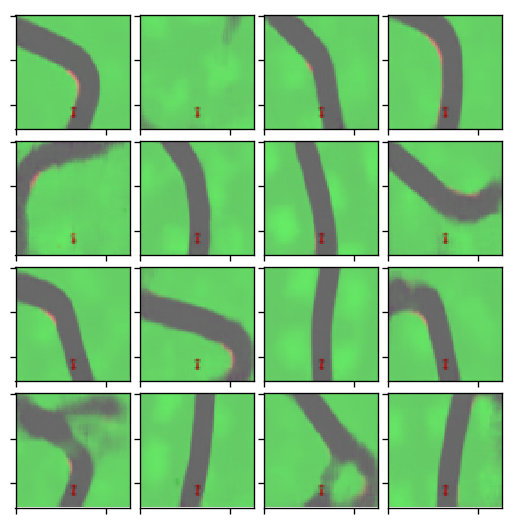

In [6]:
noise = np.random.normal(0, 1, size=16*32).reshape(16, 32)

dpi = 120
base = (128, 128)
scale = 5
plt.style.use('default')

f, axes = plt.subplots(4, 4, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

decoded = vae.decode(noise)

for ax, dec in zip(axes.flatten(), decoded):
    ax.imshow(dec)

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0.0, hspace=0.1)

f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/vae-noise.png')

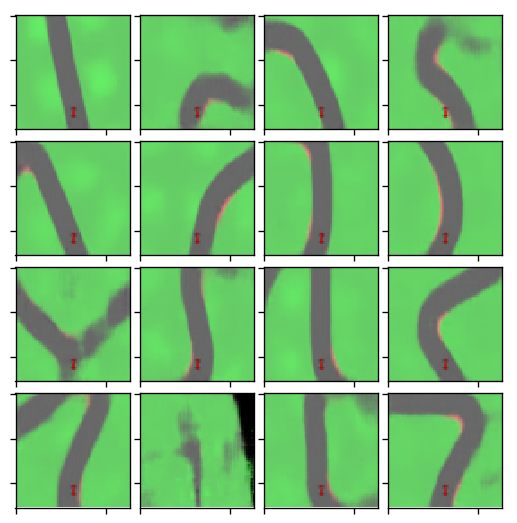

In [7]:
noise = np.random.normal(0, 1, size=16*32).reshape(16, 32)

dpi = 120
base = (128, 128)
scale = 5
plt.style.use('default')

f, axes = plt.subplots(4, 4, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

decoded = vae.decode(noise)

for ax, dec in zip(axes.flatten(), decoded):
    ax.imshow(dec)

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0.0, hspace=0.1)

## TSNE

In [8]:
data.keys()

dict_keys(['vae-loss-reconstruct', 'reconstruction-loss', 'total-reward', 'unclipped-kl-loss', 'observation', 'latent', 'vae-loss-unclipped-kl', 'mu', 'reconstruct', 'action', 'pred-latent', 'pred-reconstruct', 'logvar', 'labels', 'preds', 'error'])

In [9]:
obs.shape

(64, 64, 3)

[[ -2.612388   -7.1960096]
 [ 11.951726  -22.375662 ]
 [ 25.114035    0.7962482]
 ...
 [ 17.0833    -16.349504 ]
 [ -6.6928163 -17.722118 ]
 [  1.5303433  -6.8381934]]


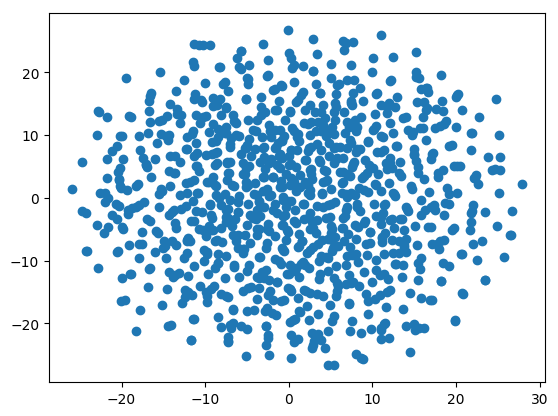

In [10]:
from sklearn.manifold import TSNE

latent = np.load(
    os.path.join(root, '2357136044', 'latent.npy')
)

obs = np.load(
    os.path.join(root, '2357136044', 'observation.npy')
)

tsne = TSNE(n_components=2)
embedded = tsne.fit_transform(np.squeeze(latent))
print(embedded)

plt.scatter(embedded[:, 0], embedded[:, 1])

## es learning

In [11]:
from worldmodels.data.sample_policy import get_max_gen

res = []
ma = 229
for gen in range(ma):
    res.append(np.load(os.path.join(home, 'control', 'generations', 'generation_{}'.format(gen), 'epoch-results.npy')))
    
res = np.array(res)

res.shape

(229, 64)

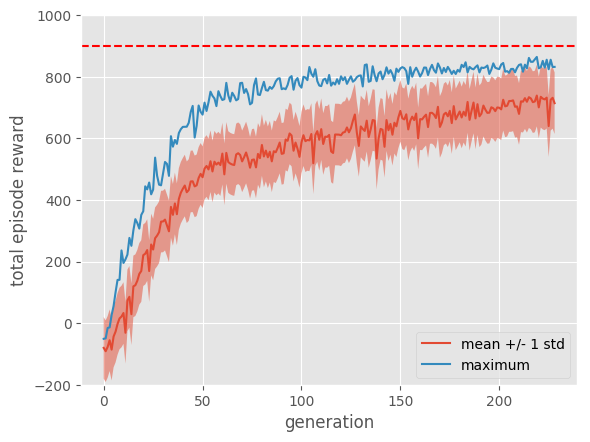

In [12]:
plt.style.use('ggplot')
plt.plot(np.mean(res, axis=1), label='mean +/- 1 std')
plt.plot(np.max(res, axis=1), label='maximum')

x = list(range(ma))
y = np.mean(res, axis=1)
error = 100
plt.fill_between(x, y-error, y+error, alpha=0.5)

plt.xlabel('generation')
plt.ylabel('total episode reward')

plt.axhline(900, color='red', linestyle='--')

plt.ylim((-200, 1000))

plt.legend()

plt.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/final.png')

## Env screens

In [13]:
from gym.envs.box2d.car_racing import CarRacing

from worldmodels.data.car_racing import process_frame

env = CarRacing()

obs = env.reset()

action = np.array([0, 1, 0])

env.viewer.window.dispatch_events()
for _ in range(50):
    next_obs, rew, done, inf = env.step(action)

Track generation: 1203..1508 -> 305-tiles track


In [14]:
next_obs.shape

(96, 96, 3)

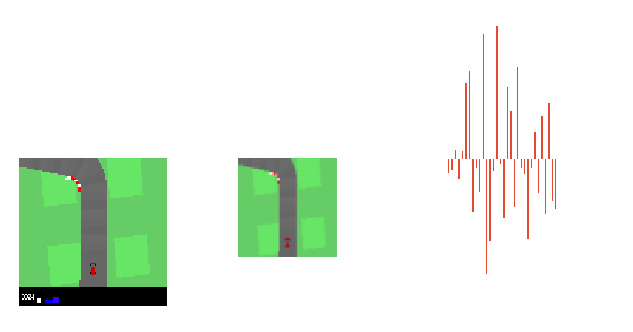

In [15]:
dpi = 120
base = (40, 20)
scale = 20
fig, axes = plt.subplots(ncols=3, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi, sharex=True, sharey=True)

axes[1].imshow(process_frame(next_obs, (64, 64), vertical_cut=84))
axes[0].imshow(next_obs)

mu, sig = vae.encode(process_frame(next_obs).reshape(1, 64, 64, 3))

latent = vae.reparameterize(mu, sig)

axes[2].bar(x=np.arange(0, 64, 2), height=latent.numpy().flatten() * 40)
#axes[2].plot(latent.numpy().flatten()* 20 + 64)

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.axis('off')
    
fig.savefig(os.path.join(home, 'blog-post', 'f1.png'))

In [16]:
vals = latent.numpy().flatten()
vals

array([ 0.22979584,  0.16965203, -0.14944316,  0.31457916, -0.12848195,
       -1.244356  , -1.4410677 ,  0.85256964,  0.14665046,  0.5273905 ,
       -2.0389628 ,  1.8710012 ,  1.3283843 ,  0.18810171, -2.1716557 ,
        0.07759339,  0.95964104, -1.1727465 , -0.79529065,  0.77617353,
       -1.5019642 ,  0.13696353,  0.23232104,  1.2933788 ,  0.1377004 ,
       -0.44094566,  0.5417797 , -0.71421134,  0.892773  , -0.9146441 ,
        0.68489707,  0.8135985 ], dtype=float32)

In [17]:
vals + 32

array([32.229797, 32.16965 , 31.850557, 32.31458 , 31.871517, 30.755644,
       30.558933, 32.85257 , 32.146652, 32.52739 , 29.961037, 33.871002,
       33.328384, 32.188103, 29.828344, 32.077595, 32.95964 , 30.827253,
       31.20471 , 32.776173, 30.498035, 32.136963, 32.232323, 33.29338 ,
       32.1377  , 31.559053, 32.54178 , 31.28579 , 32.892773, 31.085356,
       32.6849  , 32.8136  ], dtype=float32)

## Distribution of episode rewards

839.3321842046049
48


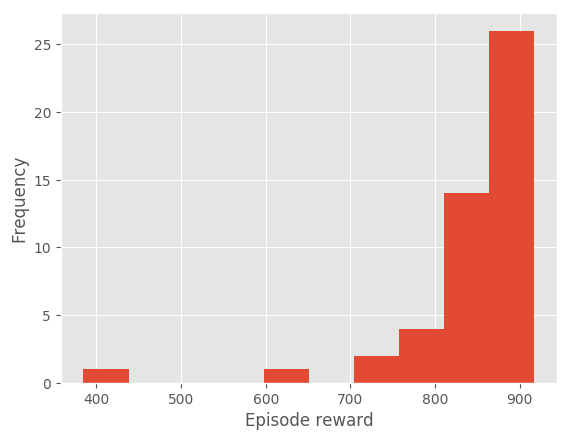

In [18]:
plt.style.use('ggplot')

rollouts = os.listdir(root)
rollouts = [r for r in rollouts if 'DS_Store' not in r]
rews = []

for rollout in rollouts:
    name = 'total-reward'
    rew = np.load(
        os.path.join(root, str(rollout), '{}.npy'.format(name))
    )

    rews.append(rew[-1])
f, a = plt.subplots()

print(np.mean(rews))
print(len(rews))
a.set_xlabel('Episode reward')
a.set_ylabel('Frequency')
a.hist(rews)
f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/final.png')

## memory learning curve


In [19]:
memory = pd.read_csv('~/git/world-models/notebooks/data/memory-training.csv')
memory.columns = [c.strip(' ') for c in memory.columns]
memory.drop('batch', axis=1, inplace=True)
memory.loc[:, 'batch'] = np.arange(memory.shape[0])

memory.tail()

,epoch,loss,batch
1995,39,1.312126,1995
1996,39,1.311955,1996
1997,39,1.311041,1997
1998,39,1.311316,1998
1999,39,1.311990,1999


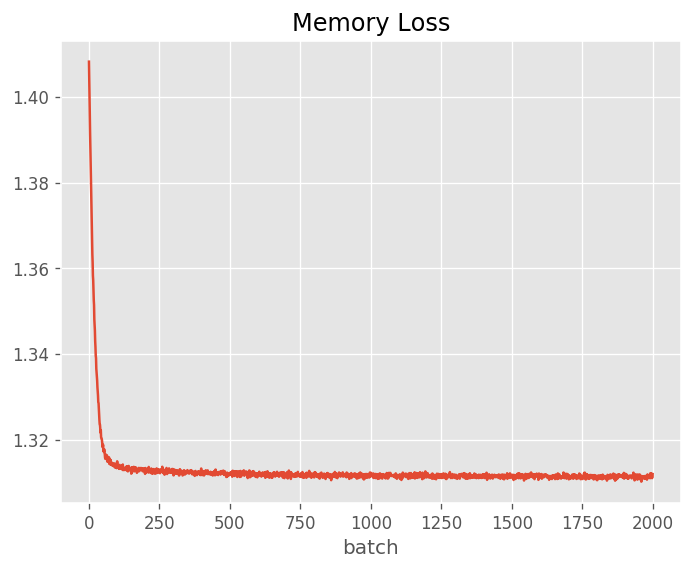

In [20]:
dpi = 120
base = (40, 30)
scale = 20
plt.style.use('ggplot')

f, a = plt.subplots(
    nrows=1, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi, sharex=True
)

memory.plot(
    x='batch',
    y='loss',
    ax=a
)

a.get_legend().remove()
    
a.set_title('Memory Loss')

f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/memory-training.png')

## VAE learning curve

In [21]:
vae = pd.read_csv('~/git/world-models/notebooks/data/vae-training.csv')

vae = vae.iloc[:167855, :]

/Users/adam/.pyenv/versions/3.6.8/envs/world-models/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
vae.columns = [c.strip(' ') for c in vae.columns]

vae = vae.astype(
    {'epoch' :'int32',
     'reconstruction-loss': 'float32',
     'kl-loss': 'float32'}
)
vae.head()

,epoch,batch,reconstruction-loss,kl-loss
0,0,0,94.612045,16.345831
1,0,1,67.949524,16.148012
2,0,2,61.308994,16.079405
3,0,3,63.676033,16.083607
4,0,4,69.853386,16.134422


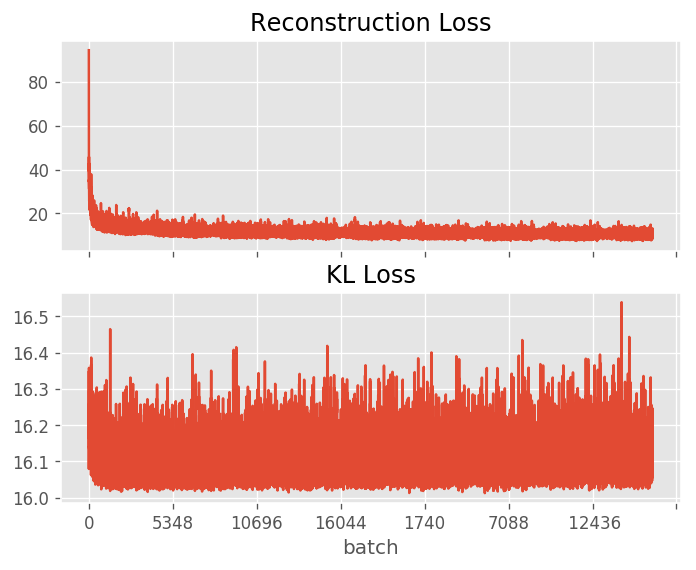

In [23]:
dpi = 120
base = (40, 30)
scale = 20
plt.style.use('ggplot')

f, a = plt.subplots(
    nrows=2, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi, sharex=True
)

vae.plot(
    x='batch',
    y='reconstruction-loss',
    ax=a[0]
)

vae.plot(
    x='batch',
    y='kl-loss',
    ax=a[1],
    label=None
)

for ax in a:
    ax.get_legend().remove()
    
a[0].set_title('Reconstruction Loss')
a[1].set_title('KL Loss')

f.savefig('/Users/adam/git/adgefficiency.github.io/assets/world-models/vae-training.png')